# Exploratory Data Analysis Lab

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Loading the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

### Distribution
#### Determining how data is being distributed

The column <b>ConvertedComp</b> contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01, which assumes 12 working months, and 50 working weeks

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


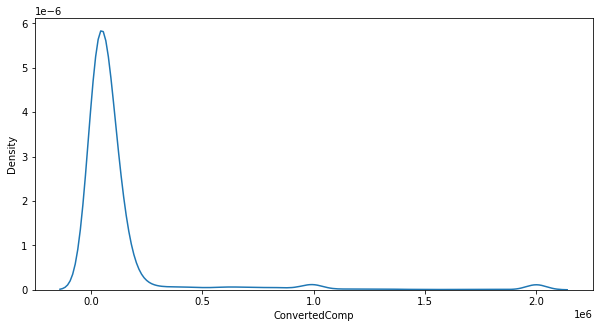

In [10]:
plt.figure(figsize = (10,5))
sns.distplot( a = df["ConvertedComp"], bins = 20, hist = False)
plt.show()

In [11]:
# Media of the column "ConvertedComp"
df["ConvertedComp"].median()

57745.0

In [12]:
# How many responders identified themselves only as a Man
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [13]:
# Median of "ConvertedComp" responders identified only as "Woman"
woman = df[df["Gender"] == "Woman"]
woman["ConvertedComp"].median()

57708.0

In [14]:
# Age summary
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<Figure size 720x360 with 0 Axes>

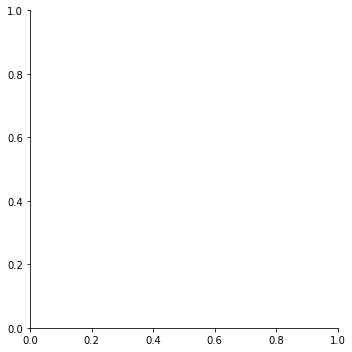

In [15]:
# Histogram of the column "Age"
plt.figure(figsize = (10,5))
sns.displot(a = df["Age"], bins = 20, kde = False)
plt.show()

<b> Finding Outliers </b>

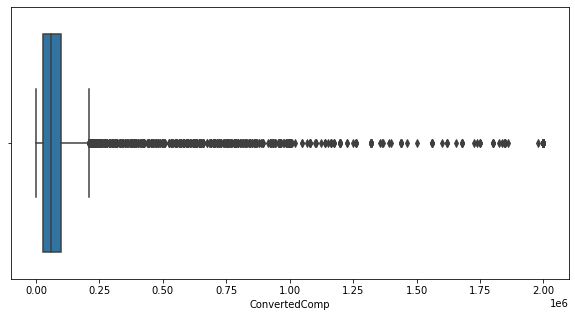

In [16]:
# Finding out if outliers exist in the column "ConvertedComp" using
# box plot

plt.figure(figsize = (10,5))
sns.boxplot(x = df.ConvertedComp, data = df)
plt.show()

In [17]:
# Finding out the Inter Quartile Range for the column "ConvertedComp"
df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [18]:
# Finding out the upper and lower bounds
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


In [19]:
# Identifying how many outliers are there in the "ConvertedComp" column.
outliers = (df["ConvertedComp"] < (Q1 - 1.5 * IQR)) | (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
outliers.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

In [20]:
less = (df["ConvertedComp"] < (Q1 - 1.5 * IQR))
less.value_counts()

False    11398
Name: ConvertedComp, dtype: int64

In [21]:
more = (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
more.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

In [22]:
# Creating a new Dataframe by removing the outliers from the "ConvertedComp" column
RemoveConvertedComp = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]
RemoveConvertedComp.head()
RemoveConvertedComp["ConvertedComp"].median()
RemoveConvertedComp["ConvertedComp"].mean()

59883.20838915799

<b> Correlation </b>

In [23]:
# Finding Correlation between "Age" and, all ofther numerical columns
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


Result - Data Visualization & Dashboard link will be provided in in "ReadME.md" file.

Screenshots of the visualization provided in the folder "graphs".
Visit the link for an interactive experience.